In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#data
data = load_breast_cancer()
x= data.data
y= data.target

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model= LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [6]:
y_pred=model.predict(x_test)

[[39  4]
 [ 1 70]]


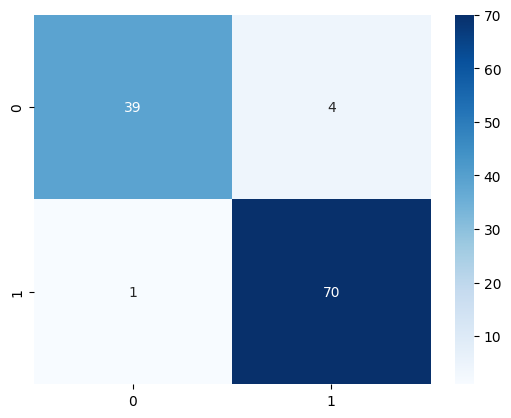

In [9]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d', cmap= 'Blues')
plt.show()

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

In [11]:
y_porbs= model.predict_proba(x_test)[:, 1]

In [12]:
fpr, tpr, thresholds= roc_curve(y_test, y_porbs)

In [13]:
auc= roc_auc_score(y_test, y_porbs)

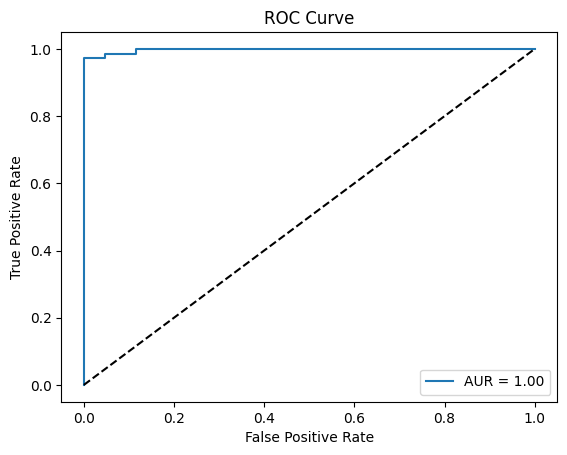

In [15]:
#plotting
plt.plot(fpr, tpr, label= f'AUR = {auc:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()